<a href="https://colab.research.google.com/github/gayakwadmilind/ML/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [17]:

data = pd.read_csv('/content/drive/MyDrive/monthly_milk_production.csv',
				index_col='Date',
				parse_dates=True)
data.index.freq = 'MS'


<Axes: xlabel='Date'>

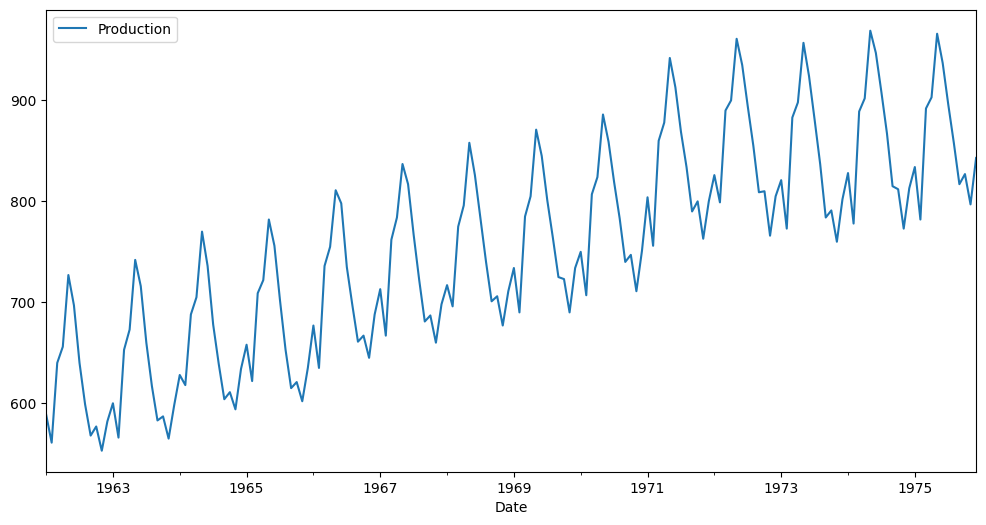

In [18]:
# Plotting graph b/w production and date
data.plot(figsize=(12, 6))


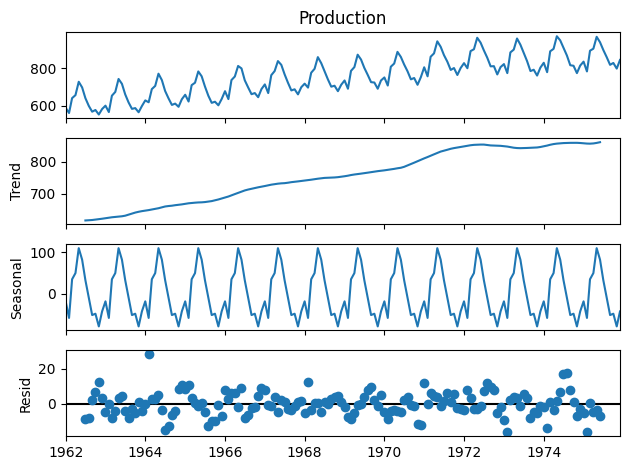

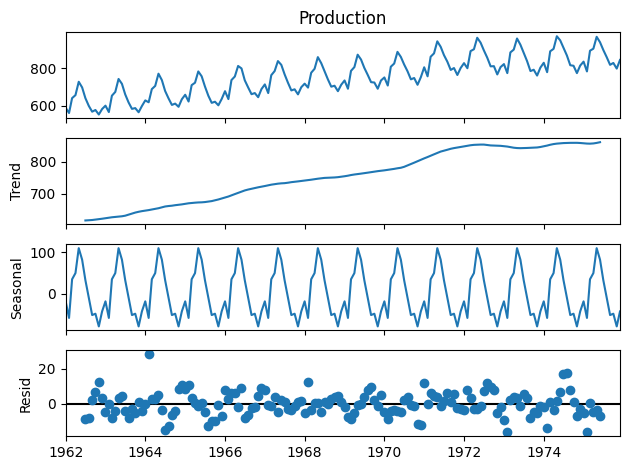

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(data['Production'])
results.plot()


In [20]:
train = data.iloc[:156]
test = data.iloc[156:]

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)


In [22]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,
								scaled_train,
								length=n_input,
								batch_size=1)
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train,
								scaled_train,
								length=n_input,
								batch_size=1)


Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [23]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu',
			input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(generator, epochs=5)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
144/144 [==============================] - 2s 4ms/step - loss: 0.0445
Epoch 2/5
144/144 [==============================] - 1s 4ms/step - loss: 0.0226
Epoch 3/5
144/144 [==============================] - 1s 4ms/step - loss: 0.0192
Epoch 4/5
144/144 [==============================] - 1s 3ms/step - loss: 0.0122
Epoch 5/5
144/144 [==============================] - 1s 4ms/step - loss: 0.0098
